# 1. Iris + abre de decision

In [ ]:
# Importation des bibliothèques nécessaires
import seaborn as sns              # Pour charger le dataset Iris
import pandas as pd                # Pour la manipulation des données
from sklearn.model_selection import train_test_split  # Pour diviser les données
from sklearn.tree import DecisionTreeClassifier       # Le modèle d’arbre de décision
from sklearn.metrics import accuracy_score           # Pour évaluer le modèle
from sklearn import tree                              # Pour la visualisation de l’arbre
import matplotlib.pyplot as plt    # Pour tracer les figures

In [ ]:

# Chargement du dataset Iris depuis seaborn
df = sns.load_dataset("iris")

# Affichage des 5 premières lignes pour vérifier le contenu
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Séparation des variables indépendantes (features) et de la variable cible (target)
X = df.drop("species", axis=1)   # Caractéristiques : longueur/largeur des pétales et sépales
y = df["species"]                # Cible : espèce de l’iris
feature_names = X.columns        # Noms des caractéristiques
class_names = y.unique()         # Noms des classes (espèces)

# Division du jeu de données en ensemble d’entraînement et de test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

Affichage des repartitions des données (train, test) selon les classes pour valider la fonction train_test_split()

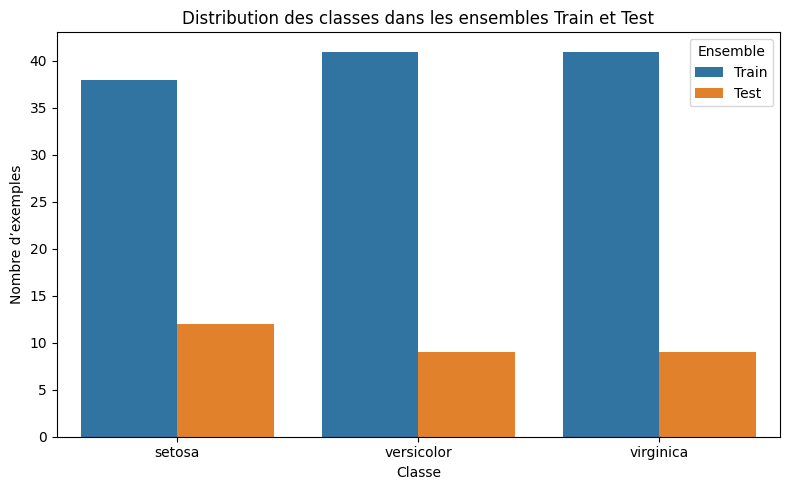

In [ ]:
# Création d’un DataFrame pour les ensembles train/test
train_dist = pd.DataFrame({'Ensemble': 'Train', 'Classe': y_train})
test_dist = pd.DataFrame({'Ensemble': 'Test', 'Classe': y_test})

# Fusion des deux pour une visualisation commune
dist_df = pd.concat([train_dist, test_dist])

# Tracé du diagramme à barres
plt.figure(figsize=(8, 5))
sns.countplot(data=dist_df, x='Classe', hue='Ensemble')
plt.title("Distribution des classes dans les ensembles Train et Test")
plt.ylabel("Nombre d’exemples")
plt.xlabel("Classe")
plt.legend(title="Ensemble")
plt.tight_layout()
plt.show()

Accuracy sur les données de test : 0.93


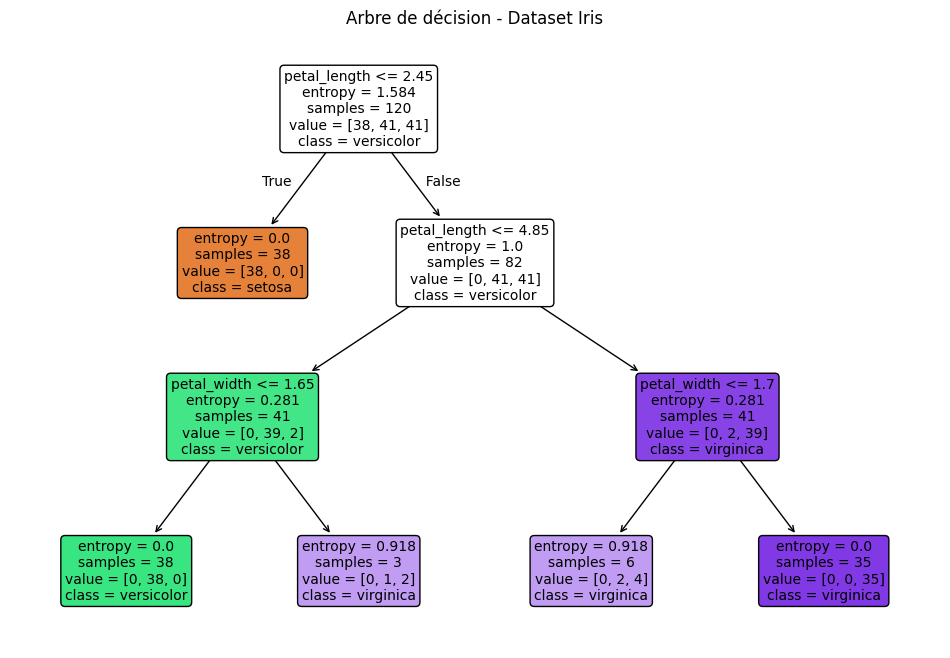

In [ ]:
# Création du modèle d’arbre de décision
# On peut spécifier le critère : 'gini' ou 'entropy'
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)


# Entraînement du modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Prédiction explicite sur l’ensemble de test
y_pred = model.predict(X_test)


# Évaluation de la performance du modèle sur l’ensemble de test
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy sur les données de test : {accuracy:.2f}")

# Visualisation de l’arbre de décision entraîné
plt.figure(figsize=(12, 8))
tree.plot_tree(model,
               feature_names=X.columns,      # Noms des caractéristiques
               class_names=model.classes_,   # Noms des classes (espèces)
               filled=True,                  # Coloration selon les classes
               rounded=True,                 # Boîtes arrondies
               fontsize=10)                  # Taille de police
plt.title("Arbre de décision - Dataset Iris")
plt.show()


**Affichage avec graphviz**

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

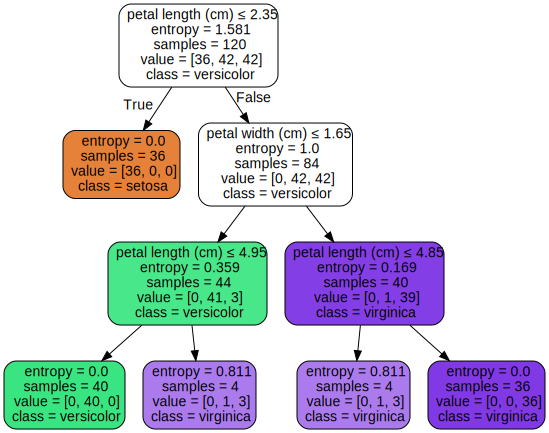

In [ ]:
# Génération du graphe en mémoire au format DOT

dot_data = export_graphviz(model,
                           out_file=None,  # Pas de fichier, chaîne en mémoire
                           feature_names=feature_names,
                           class_names=class_names,
                           filled=True, rounded=True,
                           special_characters=True)

# Affichage avec graphviz
graph = graphviz.Source(dot_data)
graph.render("tree_iris", format='png', cleanup=True)  # optionnel : sauvegarde
graph  # Pour afficher dans un notebook


# 2. Breast cancer + arbre de decision

Dimensions du dataset : (569, 30)
Noms des classes : ['malignant' 'benign']
Précision du modèle sur le test : 0.96


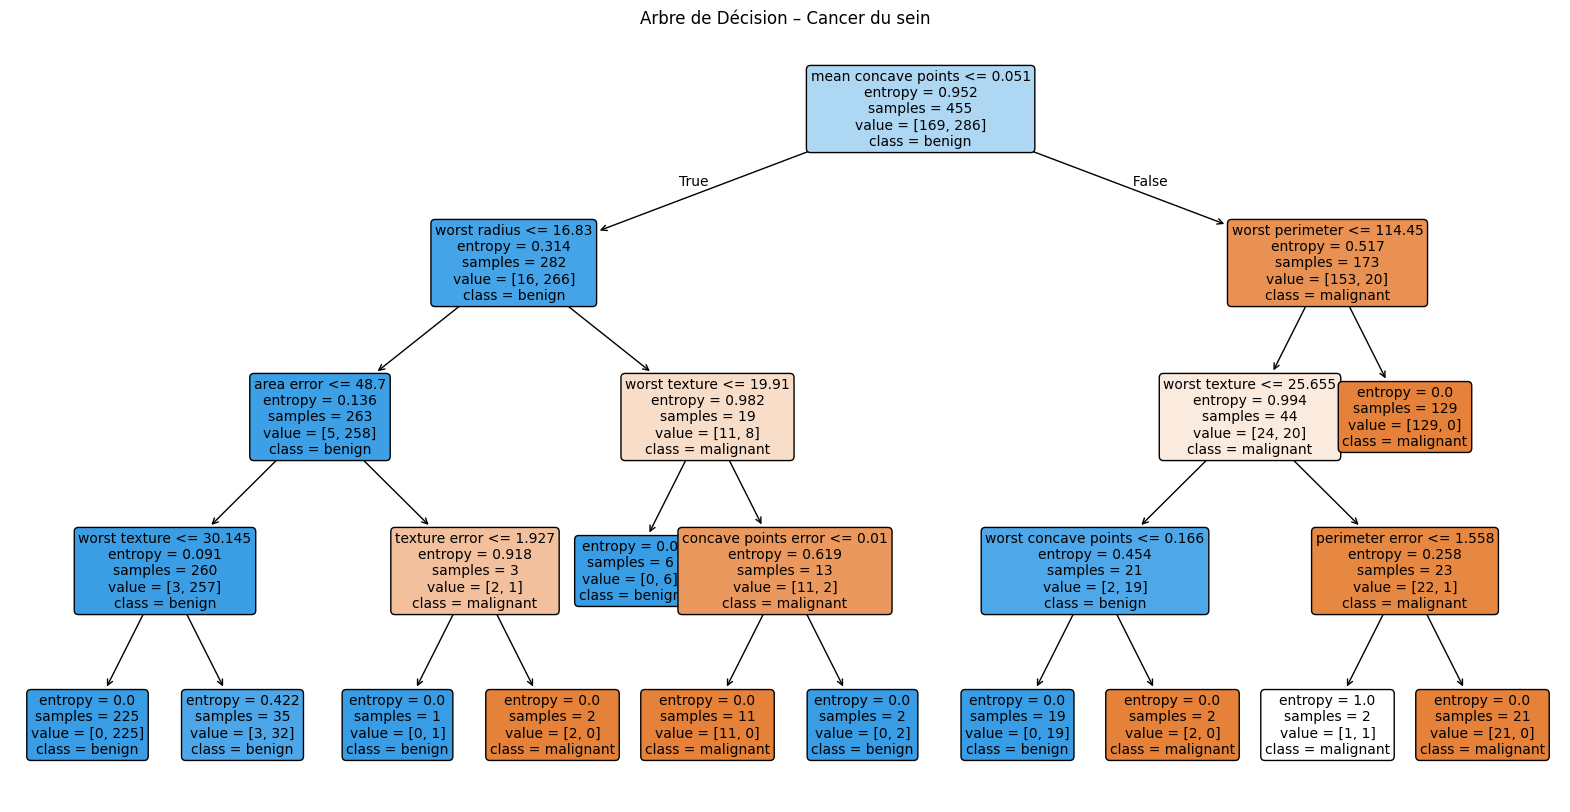

In [ ]:
# Import des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer           # Dataset intégré de sklearn
from sklearn.model_selection import train_test_split       # Division train/test
from sklearn.tree import DecisionTreeClassifier, plot_tree # Modèle et visualisation
from sklearn.metrics import accuracy_score                 # Évaluation du modèle

# Chargement du dataset cancer du sein
data = load_breast_cancer()

# Création d’un DataFrame pour faciliter la visualisation
X = pd.DataFrame(data.data, columns=data.feature_names)  # Variables explicatives
y = pd.Series(data.target)                               # Variable cible (0 = malin, 1 = bénin)

# Vérification des dimensions
print(f"Dimensions du dataset : {X.shape}")
print(f"Noms des classes : {data.target_names}")

# Division du jeu de données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciation et entraînement de l’arbre de décision
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Prédiction sur les données de test et calcul de la précision
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle sur le test : {accuracy:.2f}")

# Visualisation de l’arbre de décision
plt.figure(figsize=(20, 10))
plot_tree(clf,
          feature_names=data.feature_names,
          class_names=data.target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Arbre de Décision – Cancer du sein")
plt.show()


# Foret aleatoire + Cancer

 Arbre de Décision 
Accuracy : 0.9386
              precision    recall  f1-score   support

   malignant       0.91      0.93      0.92        42
      benign       0.96      0.94      0.95        72

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114

 ------------------------------------------------------------- 
 Forêt d'Arbres Décisionnels 
Accuracy : 0.9561
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

 ------------------------------------------------------------- 
 Matrices de confusion : 


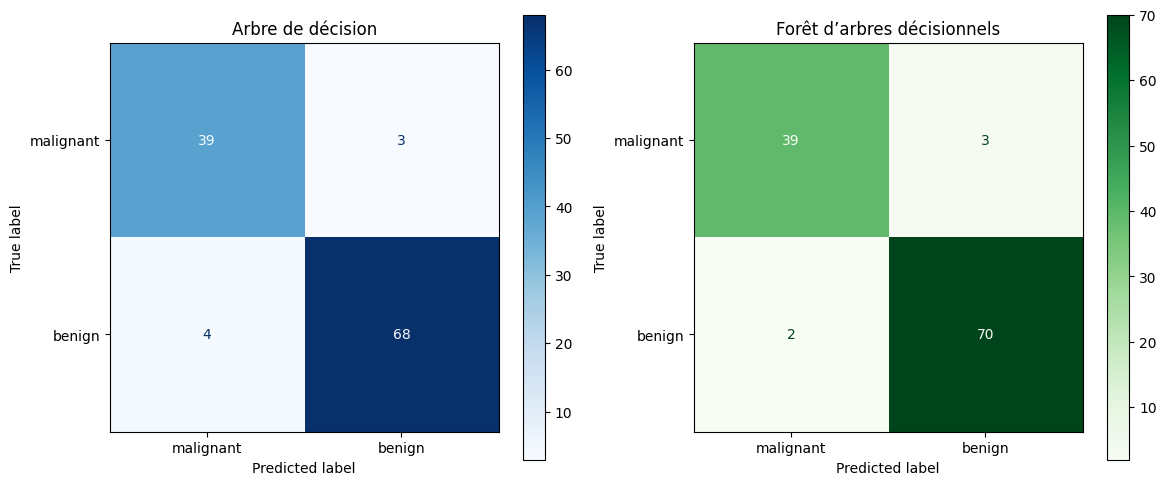

In [38]:
# Importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Outils de machine learning de scikit-learn
from sklearn.datasets import load_breast_cancer                    # Chargement du dataset
from sklearn.model_selection import train_test_split               # Pour diviser en train/test
from sklearn.tree import DecisionTreeClassifier                    # Arbre de décision
from sklearn.ensemble import RandomForestClassifier                # Forêt d'arbres décisionnels
from sklearn.metrics import accuracy_score, classification_report  # Évaluation des performances
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Matrices de confusion

# 1. Chargement du dataset
# Ce dataset contient des mesures extraites d'images de cellules mammaires (tumeurs), il faut prédire si la tumeur est bénigne (1) ou maligne (0)

data = load_breast_cancer()  # Dataset sklearn sous forme de dictionnaire

# Création d’un DataFrame pour manipuler les données plus facilement
X = pd.DataFrame(data.data, columns=data.feature_names)  # Variables d'entrée (caractéristiques)
y = pd.Series(data.target, name="target")                # Variable cible : 0 = malin, 1 = bénin



#  2. Séparation des données en train/test
# On divise les données : 80% pour l'entraînement, 20% pour le test
# stratify=y assure qu’on garde la même proportion de classes dans chaque sous-ensemble
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)



#  3. Modèle 1 : Arbre de décision
# On entraîne un seul arbre, limité à 4 niveaux pour éviter le sur-apprentissage
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)  # Apprentissage du modèle sur les données d'entraînement

# Prédictions et évaluation sur l’ensemble de test
y_pred_tree = tree_model.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)



#  4. Modèle 2 : Forêt d'arbres décisionnels
# La forêt entraîne plusieurs arbres (ici 100), chacun sur une partie aléatoire des données
# Cela améliore la robustesse et réduit le risque de sur-apprentissage
forest_model = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
forest_model.fit(X_train, y_train)

# Prédictions et évaluation sur l’ensemble de test
y_pred_forest = forest_model.predict(X_test)
acc_forest = accuracy_score(y_test, y_pred_forest)



#  5. Affichage des résultats
print(" Arbre de Décision ")
print(f"Accuracy : {acc_tree:.4f}")  # Affiche le taux de bonnes prédictions
print(classification_report(y_test, y_pred_tree, target_names=data.target_names))  # Détails


print(" ------------------------------------------------------------- ")

print(" Forêt d'Arbres Décisionnels ")
print(f"Accuracy : {acc_forest:.4f}")
print(classification_report(y_test, y_pred_forest, target_names=data.target_names))




#  6. Matrices de confusion : Ces graphiques permettent de voir combien d'exemples ont été bien ou mal classés


print(" ------------------------------------------------------------- ")
print(" Matrices de confusion : ")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 ligne, 2 colonnes

# Arbre de décision
ConfusionMatrixDisplay.from_estimator(tree_model, X_test, y_test,
                                      display_labels=data.target_names,
                                      ax=axes[0], cmap='Blues')
axes[0].set_title("Arbre de décision")

# Forêt d’arbres
ConfusionMatrixDisplay.from_estimator(forest_model, X_test, y_test,
                                      display_labels=data.target_names,
                                      ax=axes[1], cmap='Greens')
axes[1].set_title("Forêt d’arbres décisionnels")

plt.tight_layout()
plt.show()
